# Wind Data Analysis

DATA Source: https://www.kaggle.com/datasets/gregoryoliveira/brazil-weather-information-by-inmet

In [1]:
import pandas as pd
from get_files_only import get_file_from_xdrive

df_wind_2024 = get_file_from_xdrive('weather_2023.csv')


## DATA Cleansing
- removing columns
-merging with stations

In [2]:
df_wind_cleaned = df_wind_2024[['DATA (YYYY-MM-DD)', 'Hora UTC', 'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'ESTACAO']]

TypeError: 'NoneType' object is not subscriptable

As you can see, the wind data does not have a region, so we will need to use another df as a mapping

In [ ]:
stations = get_file_from_xdrive('stations.csv')


,region,state,city_station,id_station,lat,lon,lvl,record_first,record_last
0,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,2024-08-31
1,NE,BA,SALVADOR,A401,"-13,01666666","-38,51666666","51,41",2000-05-13,2024-08-31
2,N,AM,MANAUS,A101,"-3,10333333","-60,01638888","61,25",2000-05-09,2024-08-31
3,SE,RJ,ECOLOGIA AGRICOLA,A601,"-22,8","-43,68333333",33,2000-05-07,2024-08-31
4,S,RS,PORTO ALEGRE,A801,"-30,05","-51,16666666","46,97",2000-09-22,2024-08-31


In [ ]:
df_merged = pd.merge(df_wind_cleaned , stations, left_on='ESTACAO', right_on='id_station', how='left')
df_wind_2024 =df_merged.drop(columns=['lat', 'lon', 'city_station', 'state'])


,DATA (YYYY-MM-DD),Hora UTC,"VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",ESTACAO,region,id_station,lvl,record_first,record_last
0,2023-01-01,0000 UTC,3.3,1.2,A001,CO,A001,"1159,54",2000-05-07,2024-08-31
1,2023-01-01,0100 UTC,2.9,0.8,A001,CO,A001,"1159,54",2000-05-07,2024-08-31
2,2023-01-01,0200 UTC,2.5,1.5,A001,CO,A001,"1159,54",2000-05-07,2024-08-31
3,2023-01-01,0300 UTC,3.2,1.4,A001,CO,A001,"1159,54",2000-05-07,2024-08-31
4,2023-01-01,0400 UTC,5.7,2.7,A001,CO,A001,"1159,54",2000-05-07,2024-08-31


Cleansing the data to DC like structure


- **DateValueCET**- sets the date for specific measurement
- **TimeValueCET** - sets the hour for the specific measurement


In [ ]:
df_wind_2024 = df_wind_2024.rename(
    columns = {'DATA (YYYY-MM-DD)':'DateValueUTC', 'Hora UTC': 'TimeValueUTC', 
               'VENTO, RAJADA MAXIMA (m/s)': 'Wind MAX', 
               'VENTO, VELOCIDADE HORARIA (m/s)': 'Wind Hourly',
               'ESTACAO': 'Metering Station', 'region': 'Region'})
df_wind_2024['Unit'] = 'm/s'
df_wind_2024['TimeValueUTC'] = df_wind_2024['TimeValueUTC'].str[:2]


,DateValueUTC,TimeValueUTC,Wind MAX,Wind Hourly,Metering Station,Region,id_station,lvl,record_first,record_last,Unit
0,2023-01-01,00,3.3,1.2,A001,CO,A001,"1159,54",2000-05-07,2024-08-31,m/s
1,2023-01-01,01,2.9,0.8,A001,CO,A001,"1159,54",2000-05-07,2024-08-31,m/s
2,2023-01-01,02,2.5,1.5,A001,CO,A001,"1159,54",2000-05-07,2024-08-31,m/s
3,2023-01-01,03,3.2,1.4,A001,CO,A001,"1159,54",2000-05-07,2024-08-31,m/s
4,2023-01-01,04,5.7,2.7,A001,CO,A001,"1159,54",2000-05-07,2024-08-31,m/s


NOTE: CO - is Central West, which can be considered a SE in our data set

## EDA
- time range
- max-min


In [ ]:
df_temp = df_wind_2024[['DateValueUTC', 'TimeValueUTC', 'Region', 'Wind MAX','Wind Hourly', 'Unit']]
df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
df_temp['Month'] = df_temp['DateTime'].dt.month
df_temp['Region'] = df_temp['Region'].replace('CO', 'SE')
df_temp_grouped = df_temp.groupby(['DateTime', 'Region']).mean().reset_index()


C:\Users\veron\AppData\Local\Temp\ipykernel_18556\3338223923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
C:\Users\veron\AppData\Local\Temp\ipykernel_18556\3338223923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
C:\Users\veron\AppData\Local\Temp\ipykernel_18556\

Wind MAX                                                    \
                count      mean       std       min       25%       50%   
Month Region                                                              
1.0   N         744.0  3.214662  1.303968  1.320455  2.086364  2.709091   
      NE        744.0  4.659247  1.555181  1.985393  3.199708  4.533085   
      S         744.0  5.355283  1.400174  2.377922  4.194673  5.306031   
      SE        744.0  4.466864  1.350289  1.946226  3.291157  4.119655   
2.0   N         672.0  3.199313  1.275841  1.393333  2.102288  2.686806   
      NE        672.0  4.688231  1.627090  1.925843  3.162859  4.465097   
      S         672.0  5.117339  1.422627  2.382500  4.082530  5.051536   
      SE        672.0  4.298195  1.386885  2.210145  3.070274  3.996114   
3.0   N         744.0  3.267272  1.299403  1.479070  2.133547  2.794285   
      NE        744.0  4.306736  1.623963  1.763918  2.904500  4.056775   
      S         744.0  5.073561  1.350723  2.303846  3.948634  5.059204   
      SE        744.0  4.086269  1.310445  2.039614  2.894830  3.745557   
4.0   N         720.0  3.054753  1.272826  1.345652  1.948913  2.568140   
      NE        720.0  3.825073  1.469336  1.558763  2.618731  3.414048   
      S         720.0  4.898724  1.391463  2.393671  3.982570  4.870235   
      SE        720.0  3.859505  1.187621  1.964762  2.869210  3.595561   
5.0   N         744.0  3.101023  1.503679  1.227083  1.861979  2.405344   
      NE        744.0  4.207034  1.592882  1.654167  2.938250  3.774374   
      S         744.0  4.260084  1.206369  1.894937  3.354422  4.188328   
      SE        744.0  3.488401  1.229430  1.848058  2.482671  3.052423   
6.0   N         720.0  3.269825  1.713174  1.256604  1.760399  2.495503   
      NE        720.0  4.848844  1.770197  1.992708  3.355670  4.249020   
      S         720.0  4.835174  1.418269  1.925316  3.850528  4.712111   
      SE        720.0  3.571113  1.255691  1.994258  2.471314  3.131308   
7.0   N         744.0  3.465478  1.864439  1.150877  1.899091  2.478759   
      NE        744.0  5.140143  1.915762  2.220833  3.548969  4.707083   
      S         744.0  5.258635  1.930254  2.169231  4.160885  4.901948   
      SE        744.0  4.093223  1.548115  1.969378  2.763696  3.660012   
8.0   N         744.0  3.738254  1.753516  1.473585  2.195370  2.959259   
      NE        744.0  5.372190  1.673851  2.574490  4.013752  4.913936   
      S         744.0  5.428348  1.834538  2.384810  4.091426  5.105556   
      SE        744.0  4.435458  1.599789  2.077251  3.065564  4.086886   
9.0   N         720.0  4.049268  1.765659  1.647170  2.476637  3.249074   
      NE        720.0  6.095262  1.690781  2.921739  4.691994  5.736165   
      S         720.0  6.613884  1.792690  2.726506  5.264954  6.412770   
      SE        720.0  5.025063  1.528676  2.491707  3.700940  4.730538   
10.0  N         744.0  3.989862  1.516022  1.783636  2.589800  3.498216   
      NE        744.0  6.092028  1.612772  2.949550  4.772524  5.982589   
      S         744.0  6.190173  1.362873  3.171765  5.187380  6.207479   
      SE        744.0  5.036865  1.344680  2.801429  3.912485  4.747773   
11.0  N         720.0  3.973342  1.553157  1.419298  2.583490  3.503125   
      NE        720.0  5.975007  1.524648  2.827523  4.714727  6.003563   
      S         720.0  6.400606  1.644466  2.625301  5.294478  6.158745   
      SE        720.0  4.966663  1.485799  2.447465  3.755600  4.745122   
12.0  N         744.0  3.770039  1.474788  1.468750  2.458399  3.302593   
      NE        744.0  5.684235  1.626369  2.550476  4.292657  5.634398   
      S         744.0  5.935137  1.438782  2.630864  4.976524  5.825515   
      SE        744.0  4.708225  1.346012  2.384112  3.546623  4.441347   

                                  Wind Hourly                                \
                   75%        max       count      mean       std       min   
Month Region                 

In [ ]:
import pandas as pd
import numpy as np
df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
# Assume df_temp is your dataset
# Create a 'day_of_week' feature
df_temp['day_of_week'] = df_temp['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

# Cyclical encoding for hour
df_temp['hour_sin'] = np.sin(2 * np.pi * df_temp['DateTime'].dt.hour / 24)
df_temp['hour_cos'] = np.cos(2 * np.pi * df_temp['DateTime'].dt.hour / 24)

# Cyclical encoding for day of year
df_temp['day_of_year'] = df_temp['DateTime'].dt.dayofyear
df_temp['day_sin'] = np.sin(2 * np.pi * df_temp['day_of_year'] / 365)
df_temp['day_cos'] = np.cos(2 * np.pi * df_temp['day_of_year'] / 365)

# Optionally: binary feature for weekend
df_temp['is_weekend'] = df_temp['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

C:\Users\veron\AppData\Local\Temp\ipykernel_18556\1680364479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
C:\Users\veron\AppData\Local\Temp\ipykernel_18556\1680364479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
C:\Users\veron\AppData\Local\Temp\ipykernel_18556\

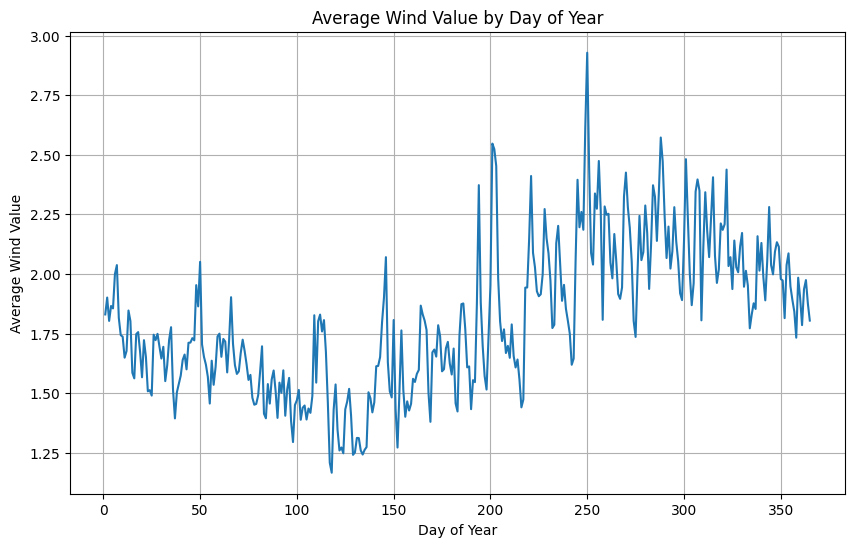

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
day_year_avg = df_temp.groupby('day_of_year')['Wind Hourly'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=day_year_avg.index, y=day_year_avg.values)
plt.title('Average Wind Value by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Wind Value')
plt.grid(True)
plt.show()

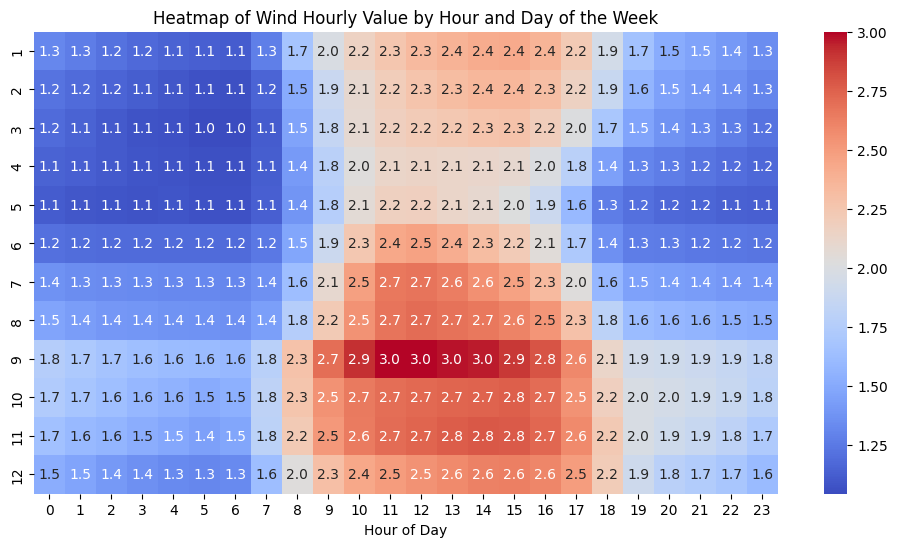

In [ ]:
from datetime import datetime
import pytz
# Pivot data to create a matrix for heatmap


df_temp['DateTime'] = pd.to_datetime(df_temp['DateValueUTC'].astype(str) + ' ' + df_temp['TimeValueUTC'].astype(str), 
                                      format='%Y-%m-%d %H:%M:%S', utc=True)

# Convert UTC to Brazil's timezone (America/Sao_Paulo)
df_temp['DateTime_Brazil'] = df_temp['DateTime'].dt.tz_convert('America/Sao_Paulo')

# Extract the hour from the Brazil-localized DateTime
df_temp['Hour_Brazil'] = df_temp['DateTime_Brazil'].dt.hour
df_temp['Month_Brazil'] = df_temp['DateTime_Brazil'].dt.month

heatmap_data = df_temp.pivot_table(index='Month_Brazil', columns='Hour_Brazil', values='Wind Hourly', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Wind Hourly Value by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.show()
